# Continuous Control with DDPG and 1 agent

---

In this notebook, we will use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt

import torch

from collections import deque
from ddpg_agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `ENV_FILE` parameter to match the location of the Unity environment that you downloaded.

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
ENV_FILE='./1_agent/Reacher.app'
env = UnityEnvironment(file_name=ENV_FILE)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain brains which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
brain_name = env.brain_names[0]
print(env.brain_names)

brain = env.brains[brain_name]

['ReacherBrain']


In [6]:
brain.camera_resolutions = 

[]

In [7]:
from unityagents import UnityRLInitializationInput
from unityagents.brain import BrainInfo

In [20]:
env._brains['ReacherBrain'].camera_resolutions [{
                "height": 768,
                "width": 1024,
#                 "blackAndWhite": x.gray_scale
            } ]

[]

### 2. Examine the State and Action Spaces

In the environment, we have a double-jointed arm that can move to target locations. The action space is encoded in `4` numbers, corresponding to the torque applicable to the two joints, and they are continuous.

The state space has `33` dimensions and contain position, rotation, velocity and angular velocities of the arm.  A reward of `+1` is provided when the hand is at the goal location.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
num_agents = len(env_info.agents)
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)
print('Actions are: ', brain.vector_action_space_type)

# examine the state space
states = env_info.vector_observations
print('States look like:', states)


state_size = states.shape[1]
print('States have length:', state_size)


Number of agents: 1
Number of actions: 4
Actions are:  continuous
States look like: [[ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
   1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
   5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  -1.68164849e-01]]
States have length: 33


### 3. Train the agent 

#### Function with the main loop and the training process



In [5]:
def ddpg( n_episodes=500, max_t=200, train_mode=True):
#     env = UnityEnvironment(file_name=ENV_FILE)
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    action_size = brain.vector_action_space_size
    env_info = env.reset(train_mode=train_mode)[brain_name]

    states = env_info.vector_observations

    agent = Agent(state_size=states.shape[1], action_size=action_size, random_seed=2)

 
    brain_name = env.brain_names[0]
    scores = []
    scores_deque = deque(maxlen=100)
    max_score = -np.Inf
    

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name]
        num_agents = len(env_info.agents)
        score = 0
        states = env_info.vector_observations
        for t in range(max_t):
            agent.reset()
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states= env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            score += np.mean(env_info.rewards)
            if np.any(dones):
                break
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")

        if i_episode % 100 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
        
        # if we reach the mean of 30, we save the model and exit because we have solve the environment
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break

#     env.close()
    return scores

We call the function to train the agent

In [6]:
scores = ddpg(n_episodes=1000, max_t=1000)

Episode 100	Average Score: 2.53	Score: 1.73
Episode 200	Average Score: 5.49	Score: 3.063
Episode 300	Average Score: 13.43	Score: 16.77
Episode 400	Average Score: 26.03	Score: 26.09
Episode 500	Average Score: 27.32	Score: 32.38
Episode 600	Average Score: 28.11	Score: 1.886
Episode 692	Average Score: 30.06	Score: 30.74
Environment solved in 692 episodes!	Average Score: 30.06


#### We plot the scores

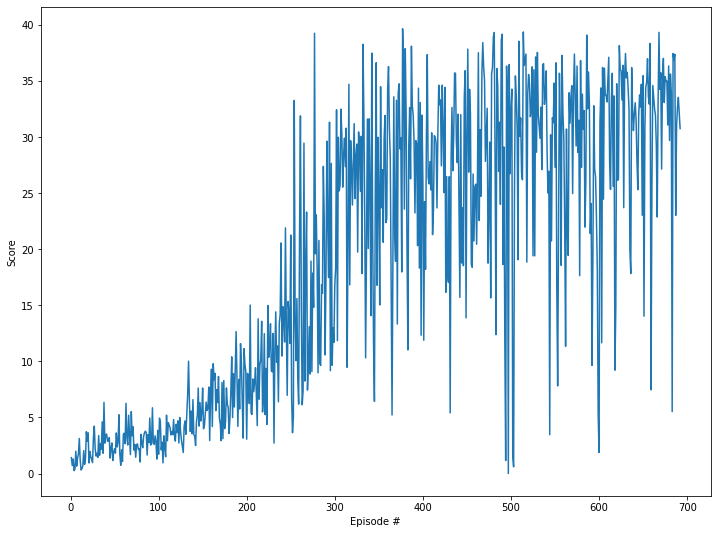

In [7]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('train_scores.png')
plt.show()

We also save the score graph

In [8]:
plt.figure(figsize=(15,10))
plt.savefig('train_scores.png')

<Figure size 1080x720 with 0 Axes>

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [3]:
# env = UnityEnvironment(file_name=ENV_FILE)

brain_name = env.brain_names[0]
brain = env.brains[brain_name]
action_size = brain.vector_action_space_size
env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations



agent = Agent(state_size=states.shape[1], action_size=action_size, random_seed=2)


# We load the weights of a trained agent 

agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

state = env.reset()
agent.reset() 
score = 0
while True:
    agent.reset()
    actions = agent.act(states)
    env_info = env.step(actions)[brain_name]
    next_states= env_info.vector_observations
    rewards = env_info.rewards
    dones = env_info.local_done
    states = next_states
    score += np.mean(env_info.rewards)
    if np.any(dones):
        break

print('Score: ', score)

Score:  35.27999921143055


In [4]:
       
env.close()